#### GPU check

In [1]:
!nvidia-smi

Tue Apr 23 15:44:46 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 517.20       Driver Version: 517.20       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P3    11W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
base = os.getcwd()
print(base)

C:\Users\nikhi\Data_Science\yolov9


### cloning repo

In [3]:
#!git clone https://github.com/SkalskiP/yolov9.git
#%cd yolov9
#!pip install -r requirements.txt -q

In [4]:
!pip install -q roboflow

### create folder to store weights

In [6]:
import os

In [8]:
os.mkdir('base')

In [9]:
os.mkdir('base/weights')

### manually load the weights

In [ ]:
#https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
#https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
#https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
#https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [10]:
for fname in os.listdir('base/weights'):
     print(fname)

gelan-e.pt


### create folder for data

In [12]:
os.mkdir("base/data")

### upload image manually

In [13]:
SOURCE_IMAGE_PATH = "dc.jpeg"

### detecting on image

In [14]:
!python detect.py --weights base/weights/gelan-e.pt --conf 0.1 --source dc.jpeg --device 0

detect: weights=['base/weights/gelan-e.pt'], source=dc.jpeg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  2024-4-22 Python-3.8.19 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 690 layers, 57345920 parameters, 0 gradients, 189.0 GFLOPs
image 1/1 C:\Users\nikhi\Data_Science\yolov9\dc.jpeg: 352x640 1 cat, 1 dog, 134.8ms
Speed: 0.0ms pre-process, 134.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


In [15]:
from tensorflow.keras.utils import load_img

Image = load_img('runs/detect/exp3/dc.jpeg')

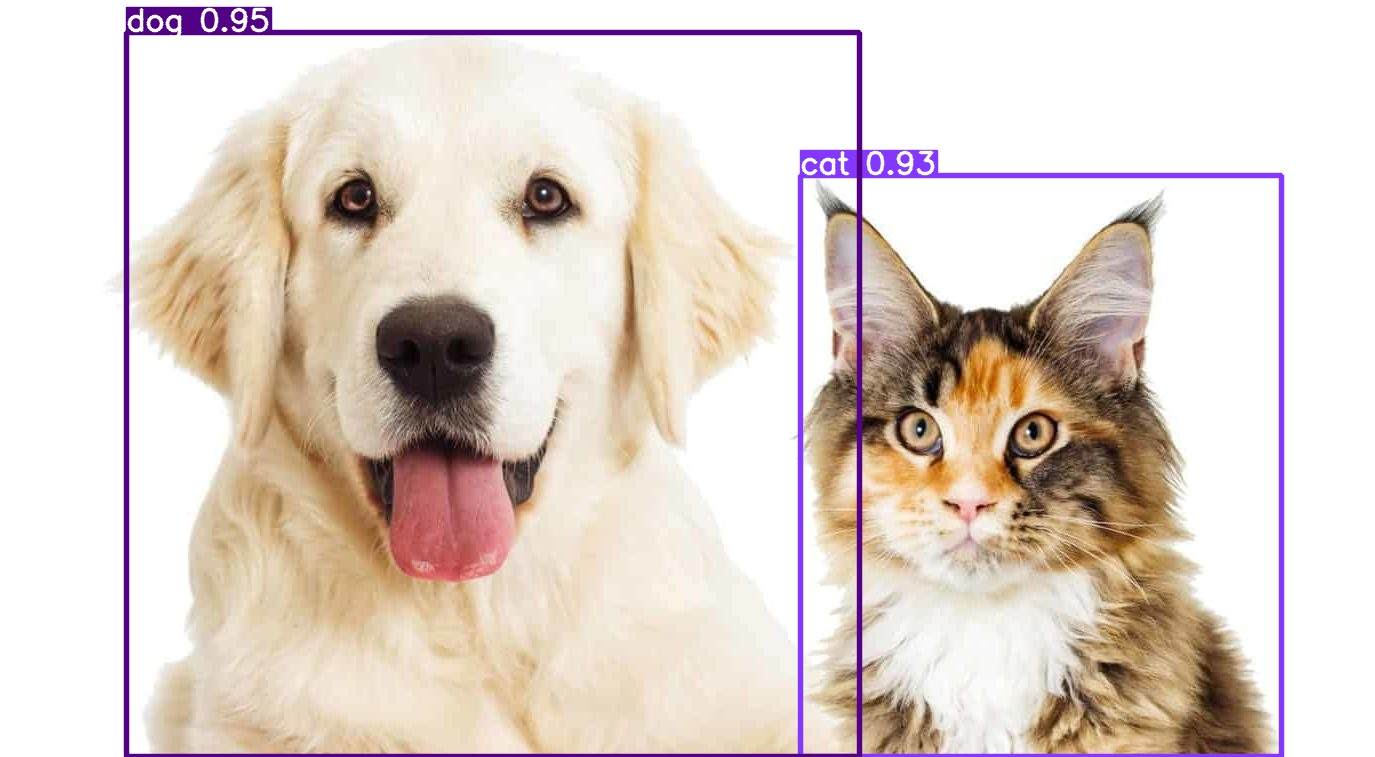

In [16]:
Image

### detection on video

In [21]:
import cv2

In [26]:
!python detect.py --weights base/weights/gelan-e.pt --conf 0.1 --source b.mp4

detect: weights=['base/weights/gelan-e.pt'], source=b.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  2024-4-22 Python-3.8.19 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 690 layers, 57345920 parameters, 0 gradients, 189.0 GFLOPs
video 1/1 (1/618) C:\Users\nikhi\Data_Science\yolov9\b.mp4: 640x384 6 persons, 3 cars, 3 motorcycles, 2 trucks, 1 traffic light, 1 cup, 78.1ms
video 1/1 (2/618) C:\Users\nikhi\Data_Science\yolov9\b.mp4: 640x384 5 persons, 2 cars, 4 motorcycles, 2 trucks, 1 traffic light, 1 cup, 62.6ms
video 1/1 (3/618) C:\Users\nikhi\Data_Science\yolov9\b.mp4: 640x384

## Custome yolov9 Model for detecting monkeys

In [27]:
from roboflow import Roboflow
rf = Roboflow(api_key="KnO1HFUawybkKzxGovmP")
project = rf.workspace("nikhil-8yfpr").project("cow_monkey")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cow_monkey-3 in yolov9:: 100%|██████████| 450/450 [00:00<00:00, 1553.95it/s]


### train model on colab

In [28]:
'''
!python train.py \
--batch 2 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {base}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml
'''

'\n!python train.py --batch 2 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 --data {dataset.location}/data.yaml --weights {base}/weights/gelan-c.pt --cfg models/detect/gelan-c.yaml --hyp hyp.scratch-high.yaml\n'

#### use the best.pt weight which located at '/yolov9/runs/train/exp/weights/best.pt'

In [30]:
!python detect.py --weights base/weights/mon.pt --conf 0.1 --source m1.mp4

detect: weights=['base/weights/mon.pt'], source=m1.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  2024-4-22 Python-3.8.19 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25227859 parameters, 0 gradients, 101.8 GFLOPs
video 1/1 (1/339) C:\Users\nikhi\Data_Science\yolov9\m1.mp4: 640x384 2 monkeys, 46.9ms
video 1/1 (2/339) C:\Users\nikhi\Data_Science\yolov9\m1.mp4: 640x384 1 monkey, 47.2ms
video 1/1 (3/339) C:\Users\nikhi\Data_Science\yolov9\m1.mp4: 640x384 1 monkey, 46.8ms
video 1/1 (4/339) C:\Users\nikhi\Data_Science\yolov9\m1.mp4: 640x384 1 monkey, 46.9ms
video 1/1

In [31]:
!python detect.py --weights base/weights/mon.pt --conf 0.1 --source m2.mp4

detect: weights=['base/weights/mon.pt'], source=m2.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  2024-4-22 Python-3.8.19 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25227859 parameters, 0 gradients, 101.8 GFLOPs
video 1/1 (1/289) C:\Users\nikhi\Data_Science\yolov9\m2.mp4: 640x480 5 monkeys, 46.9ms
video 1/1 (2/289) C:\Users\nikhi\Data_Science\yolov9\m2.mp4: 640x480 4 monkeys, 36.3ms
video 1/1 (3/289) C:\Users\nikhi\Data_Science\yolov9\m2.mp4: 640x480 4 monkeys, 47.0ms
video 1/1 (4/289) C:\Users\nikhi\Data_Science\yolov9\m2.mp4: 640x480 3 monkeys, 46.9ms
video 

In [32]:
!python detect.py --weights base/weights/mon.pt --conf 0.1 --source m3.mp4

detect: weights=['base/weights/mon.pt'], source=m3.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  2024-4-22 Python-3.8.19 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25227859 parameters, 0 gradients, 101.8 GFLOPs
video 1/1 (1/2527) C:\Users\nikhi\Data_Science\yolov9\m3.mp4: 384x640 3 monkeys, 77.6ms
video 1/1 (2/2527) C:\Users\nikhi\Data_Science\yolov9\m3.mp4: 384x640 2 monkeys, 62.5ms
video 1/1 (3/2527) C:\Users\nikhi\Data_Science\yolov9\m3.mp4: 384x640 4 monkeys, 62.5ms
video 1/1 (4/2527) C:\Users\nikhi\Data_Science\yolov9\m3.mp4: 384x640 2 monkeys, 67.7ms
vi